
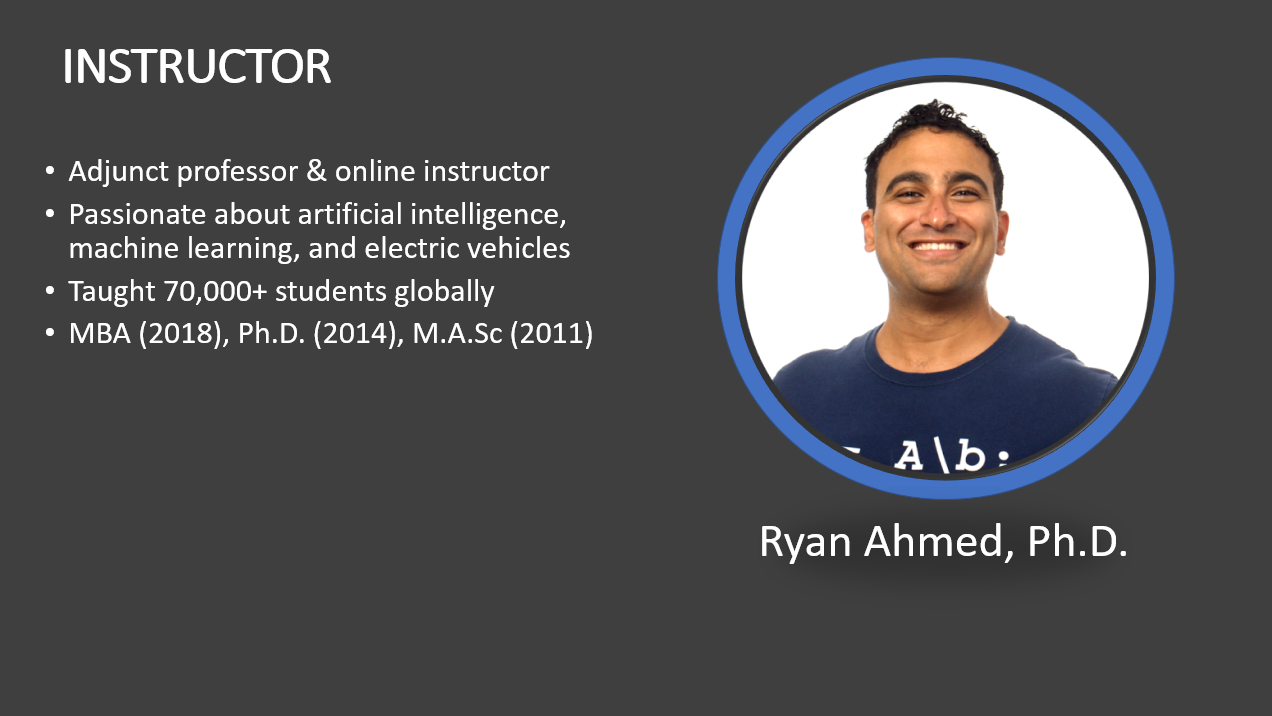

# ** SAKARYA ÜNİVERSİTESİ **
-
-
## ** BİLGİSAYAR VE BİLİŞİM SİSTEMLERİ FAKÜLTESİ **
-
-
## ** BİLGİSAYAR MÜHENDİSLİĞİ **
-
-
-
-

## ** TASARIM ÇALIŞMASI **
-
-

### PROJE KONUSU:
** Derin Öğrenme Teknikleri Kullanılarak Trafik İşaretlerinin Sınıflandırılması **
-
-
-
-

## **DANIŞMAN:**
### DR. ÖĞR.ÜYESİ SERAP ÇAKAR

-

## **ÖĞRENCİLER:**
### * ŞÜKRÜ UFUK AKSOY – G121210053
### * GÖKHAN SIBIÇ – B130910044
### * EMRE ÇAKMAK – B161210057


# AŞAMA #1: PROJE İÇERİĞİ 

* Trafik işaretlerinin sınıflandırılması, otonom araçlar için oldukça önemlidir.
* Bu projede, Derin Öğrenme ile bir model oluşturulmuştur.
* Oluşturulan model türü: Derin Konvolüsyonel Sinir Ağları (Deep Convolutional Neural Network)

* Elde edilen dataset Kaggle'dan alınmıştır ve 43 farklı trafik işaretlerinin sınıflandırılması sonucu oluşmuştur.
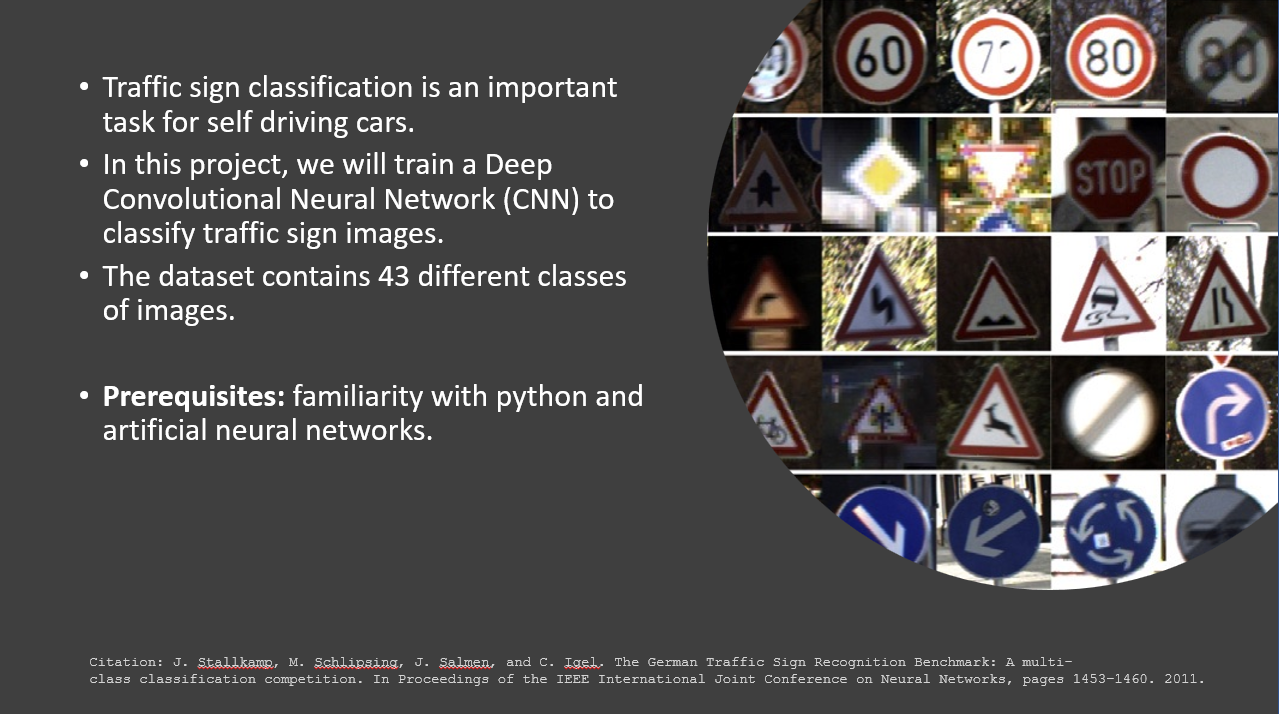

# AŞAMA #2: KÜTÜPHANELERİN EKLENMESİ VE VERİ SETİ

In [2]:
import matplotlib.pyplot as plt # Verilerin Görselleştirilmesi 
import numpy as np              # Numerik Analiz
import tensorflow as tf         # Makine ve Derin Öğrenme Modellerinin Oluşturulması
import pandas as pd             # DataFrame'lerin ve Series'lerin Kontrolü
import seaborn as sns           # Veri Görselleştirilmesi 
import pickle                   # Verileri Serileştirme - Verilerin Yüklenmesi (Data Load)
import random                   # Rastgele Sayı Üretimi

In [3]:
#Pickle kullanılarak .p formatındaki model train&valid&test olarak değişkenlere atanır.
with open("./trafficSignsDataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./trafficSignsDataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./trafficSignsDataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
#train, valid ve test değişkenleri içerisinde "features" ve "labels" olmak üzere iki matris tutmaktadır.
#Tutulan bu matrislerden "features" olanı görüntünün özelliklerini tutarken; "labels" görüntünün sınıf numarasını tutmaktadır.

#Fautures, görüntülerin özellikleri, boyutları ve derinliklerini tutan bir matristir. (görüntü sayısı, görüntü boyutu (x,y), derinlik)
X_train, y_train=train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
X_test.shape

(12630, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
y_validation.shape

(4410,)

In [10]:
y_test.shape

(12630,)

# AŞAMA #3: GÖRÜNTÜ GÖRSELLEŞTİRMESİNİN UYGULANMASI (IMAGE VISUALIZATION)

Bu aşamada görüntülerin, veri setinin doğru bir şekilde yüklenip yüklenmediği yani veri setinin doğruluğu kontrol edilir.

1

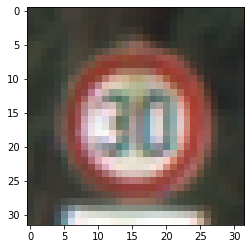

In [11]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

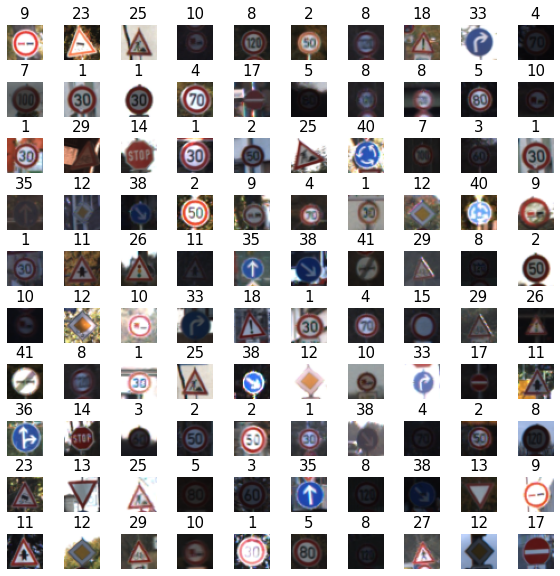

In [12]:
# Bu kod bloğunda birden fazla görüntünün veri setinden çekilerek,
# matris formatında ekrana yazdırılması (grid formatta) uygulanmıştır:


W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)


fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)

    # seçilen dizine sahip bir görüntüyü oku ve görüntüle 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.6)    

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [13]:
#Veri setinin karıştırılması için yapılmaktadır.
#Buradaki amaç, modelin ezberlemesini engellemektir.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
#3 boyutlu görüntüleri tek boyutlu ve gri ölçekleme formuna dönüştürme

X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims = True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
#Normalizasyon işleminin uygulanması

X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [17]:
X_train_gray_norm

array([[[[ 0.78385417],
         [ 0.76041667],
         [ 0.75260417],
         ...,
         [ 0.29947917],
         [ 0.3984375 ],
         [ 0.34895833]],

        [[ 0.77604167],
         [ 0.75520833],
         [ 0.7421875 ],
         ...,
         [ 0.29166667],
         [ 0.421875  ],
         [ 0.40625   ]],

        [[ 0.76041667],
         [ 0.73697917],
         [ 0.7421875 ],
         ...,
         [ 0.28385417],
         [ 0.43229167],
         [ 0.4453125 ]],

        ...,

        [[ 0.95572917],
         [ 0.98958333],
         [ 0.9921875 ],
         ...,
         [ 0.41145833],
         [ 0.4453125 ],
         [ 0.45052083]],

        [[ 0.9453125 ],
         [ 0.98697917],
         [ 0.98958333],
         ...,
         [ 0.47916667],
         [ 0.49739583],
         [ 0.51041667]],

        [[ 0.9375    ],
         [ 0.9765625 ],
         [ 0.96354167],
         ...,
         [ 0.53125   ],
         [ 0.546875  ],
         [ 0.55989583]]],


       [[[-0.89322917],


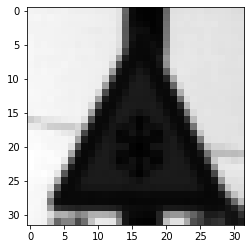

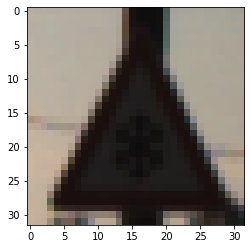

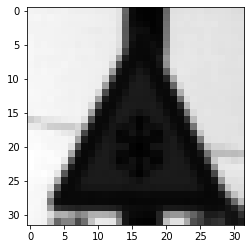

In [18]:
#Görüntülerin karşılaştırılması:

i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray') #Gray scale görüntü
plt.figure()
plt.imshow(X_train[i])  # Normal - Renkli Görüntü
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray') 

# AŞAMA #5: DERİN KONVOLÜSYONEL SİNİR AĞI MODELİ (Deep CNN Model)

In [24]:
from tensorflow.keras import datasets, layers, models  #Model için keras kütüphanesinin kullanılması 

CNN = models.Sequential() #modelin ardışık olarak oluşturulması, "CNN" model adı

# Birinci Konvolüsyon Katmanı
# Pooling Katmanı 
# İkinci Konvolüyson Katmanı
# Pooling Katmanı 
# Flatten 
# Fully Connected
# Dense


## İlk Katman ##
#layers'lara git ve 6 adet (5,5) konvolüsyon uygula
#Aktivasyon 'reLu' kullan -> Features map'i güçlendirmek için kullanılır.
#Model girdi boyutu 32x32x1

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape = (32, 32, 1))) 
CNN.add(layers.AveragePooling2D())  #Ortalama Pooling Layer


CNN.add(layers.Dropout(0.1)) # %20 droput   # Aşırı öğrenmeyi (Overfitting) engellemek için bazı nöronları, model unuttu.

## İkinci Katman ##
#layers'lara git ve 16 adet (5,5) konvolüsyon uygula
#Aktivasyon 'reLu' kullan -> Features map'i güçlendirmek için kullanılır.
#Model girdi boyutu bu katmanda yazılmaz. Giriş katmanında yazılmaktadır.

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())   # Matris formundaki veriyi düzleştirmek için kullanılır.

#Dense katmanları
#Girdideki düğümleri bir sonraki katmandaki düğümlere bağlar
CNN.add(layers.Dense(120, activation = 'relu'))  #120 nöron, relu aktivasyon fonksiyonuyla (-1,1) aralığı
CNN.add(layers.Dense(84,  activation = 'relu'))

# !!!! ÖNEMLİ !!!!
# 43 adet sınıf olduğu için çıkışın da 43 tane nöronla yapılması gerekmektedir. 
CNN.add(layers.Dense(43,  activation = 'softmax'))

CNN.summary()

# Eğitim için model tarafından toplam parametres sayısı : 64.511   (Trainable Parameters)
# Eğitilemeyecek bir parametre modelde bulunmamaktadır.            (Non-Trainable Parameters)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

# AŞAMA #6: DERLEME VE DEEP CNN MODELİ EĞİTME

In [25]:
#
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [26]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 2,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 5s 64ms/step - loss: 3.4868 - accuracy: 0.0969 - val_loss: 2.8885 - val_accuracy: 0.2576
Epoch 2/50
70/70 [==============================] - 4s 62ms/step - loss: 2.1725 - accuracy: 0.4119 - val_loss: 1.3572 - val_accuracy: 0.6120
Epoch 3/50
70/70 [==============================] - 4s 62ms/step - loss: 1.0982 - accuracy: 0.6777 - val_loss: 0.9535 - val_accuracy: 0.7163
Epoch 4/50
70/70 [==============================] - 4s 64ms/step - loss: 0.7723 - accuracy: 0.7747 - val_loss: 0.8005 - val_accuracy: 0.7692
Epoch 5/50
70/70 [==============================] - 5s 76ms/step - loss: 0.6272 - accuracy: 0.8219 - val_loss: 0.7104 - val_accuracy: 0.7776
Epoch 6/50
70/70 [==============================] - 5s 76ms/step - loss: 0.5206 - accuracy: 0.8536 - val_loss: 0.6587 - val_accuracy: 0.8014
Epoch 7/50
70/70 [==============================] - 5s 75ms/step - loss: 0.4451 - accuracy: 0.8780 - val_loss: 0.6304 - val_accuracy: 0.8100
Epoch 8/50
70

# TASK #8: EĞİTİLMİŞ CNN MODELİN PERFORMANS DEĞERLENDİRMESİ 

In [28]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.7556 - accuracy: 0.8884
Test Accuracy: 0.8884402513504028


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

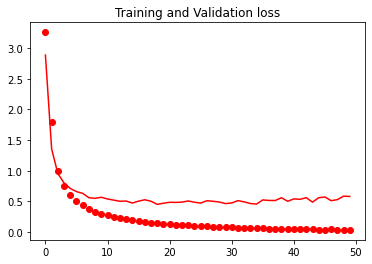

In [31]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Training and Validation loss")

Text(0.5, 1.0, 'Training and Validation Acc')

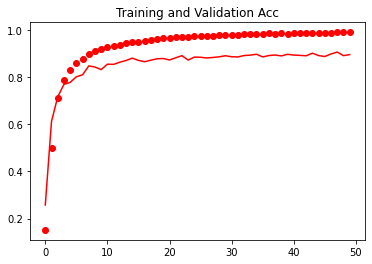

In [34]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title("Training and Validation Acc")

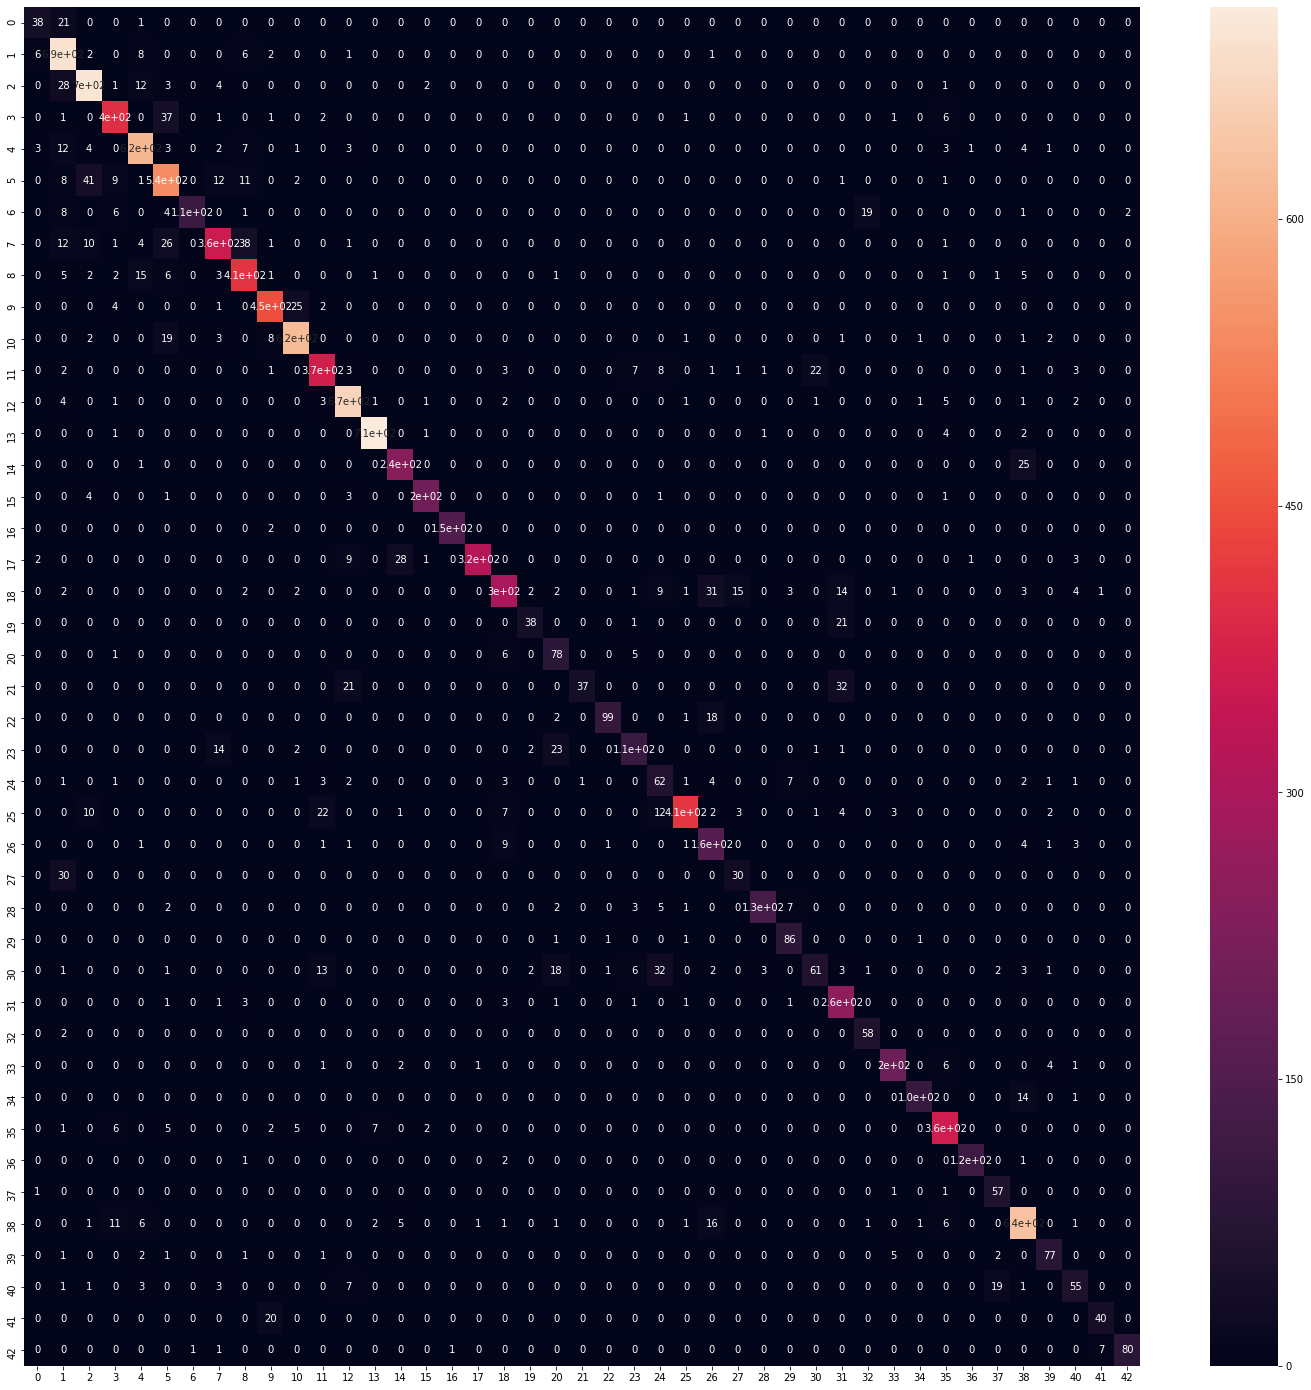

In [35]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [36]:
import json
def returnClassName(classIndex):
    with open('./classNames.json') as classNameFolder:
        classNameFolder = json.load(classNameFolder)
        return classNameFolder[classIndex]["className"]

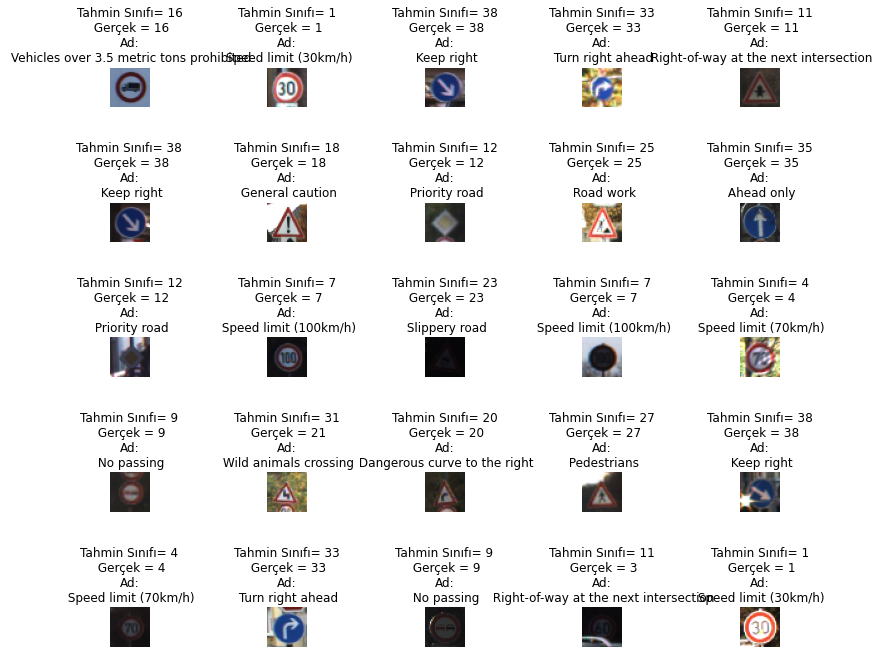

In [38]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    className = returnClassName(predicted_classes[i])

    axes[i].set_title('Tahmin Sınıfı= {}\n Gerçek = {}\nAd:\n {}'.format(predicted_classes[i], y_true[i], className))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 3)    

# SINIFLARIN ADLANDIRILMASI
- 43 adet farklı sınıflara ayrılan Trafik İşaretlerinin label karşılıkları aşağıdaki listede verilmiştir.
 
- SINIFLAR VE KARŞILIKLARI: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }